In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import nltk
from nltk.tokenize import sent_tokenize


In [9]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\WeronikaGozdera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Datasets Mappings (model -> file)

In [ ]:
DATASET = 'CL4R1T4S'
DATASET_CLEANED = 'CL4R1T4S_cleaned'

PROMPTS = {
    "CL4R1T4S": {
        "ANTHROPIC": {
            "Claude Sonnet 4": [
                "/ANTHROPIC/Claude_4.txt"
            ],
            "Claude Sonnet 3.5": [
                "/ANTHROPIC/Claude_Sonnet_3.5.md"
            ],
            "Claude Sonnet 3.7": [
                "/ANTHROPIC/Claude_Sonnet_3.7_New.txt"
            ],
            "Claude Sonnet 4.5": [
                "/ANTHROPIC/Claude_Sonnet-4.5_Sep-29-2025.txt"
            ],
            "Claude Opus 4.1": [
                "/ANTHROPIC/Claude-4.1.txt"
            ],
            "Claude Opus 4.5": [
                "/ANTHROPIC/Claude-4.5-Opus.txt"
            ]
        },
        "GOOGLE": {
            "Gemini Diffusion": [
                "/GOOGLE/Gemini_Diffusion.md"
            ],
            "Gemini 2.5 Pro": [
                "/GOOGLE/Gemini-2.5-Pro-04-18-2025.md"
            ]
        },
        "XAI": {
            "Grok 4": [
                "/XAI/Grok4-July-10-2025.md"
            ],
            "Grok 4.1": [
                "/XAI/GROK-4.1_Nov-17-2025.txt"
            ],
            "Grok 3": [
                "/XAI/Grok3_updated_07-08-2025.md"
            ]
        },
        "OPENAI": {
            "Atlas": [
                "/OPENAI/Atlas_10-21-25.txt"
            ],
            "ChatGPT 4.1": [
                "/OPENAI/ChatGPT_4.1_05-15-2025.txt"
            ],
            "ChatGPT 4o": [
                "/OPENAI/ChatGPT_4o_04-25-2025.txt"
            ],
            "ChatGPT o4 mini": [
                "/OPENAI/ChatGPT_o3_o4-mini_04-16-2025"
            ],
            "ChatGPT 5": [
                "/OPENAI/ChatGPT5-08-07-2025.mkd"
            ],
            "ChatGPT 4.5": [
                "/OPENAI/GPT-4.5_02-27-25.md"
            ]
        },
        "META": {
            "Llama4": [
                "/META/Llama4_WhatsApp.txt"
            ]
        }
    }
}

# ANALYSIS OVER TIME

## Models Release Dates

In [11]:
RELEASE_DATES = {    
    'ANTHROPIC': {
        # 'Claude 3': '04.03.2024',
        'Claude Sonnet 4': '22.05.2025',
        'Claude Sonnet 3.5': '20.06.2024',
        'Claude Sonnet 3.7': '24.02.2025',
        'Claude Sonnet 4.5': '27.09.2025',
        'Claude Opus 4.1': '05.08.2025',
        'Claude Opus 4.5': '24.11.2025',
        # 'User Style': { }
    },
    'GOOGLE': {
        'Gemini Diffusion': '20.05.2025',
        # 'Gemini Gmail Assistant': { },
        'Gemini 2.5 Pro': '23.03.2025',
        # 'Gemini 2.0': { }
    },
    'XAI': {
        # 'Grok 2': '13.08.2024',
        'Grok 4': '09.07.2025',
        'Grok 4.1': '17.11.2025',
        'Grok 3': '19.02.2025'
    },
    'OPENAI': {
        'Atlas': '21.10.2025',
        'ChatGPT 4.1': '14.04.2025',
        'ChatGPT 4o': '13.05.2024',
        # 'ChatGPT o3': '16.04.2025',
        'ChatGPT o4 mini': '16.04.2025',
        'ChatGPT 5': '07.08.2025',
        'ChatGPT 4.5': '27.02.2025'
    },
    'META': {
        'Llama4': '05.04.2025'
    }
}

## Prompts Size Over Time

In [12]:
def read_prompt(dataset, model):
    file_path = f"{dataset}{model}"
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        text = ''.join(lines)
    return text, lines

def collect_prompt_data():
    prompt_data = []
    
    for provider, models in PROMPTS[DATASET].items():
        for model, file_list in models.items():

            if provider in RELEASE_DATES and model in RELEASE_DATES[provider]:
                release_date_str = RELEASE_DATES[provider][model]
                release_date = datetime.strptime(release_date_str, '%d.%m.%Y')
                
                if file_list:
                    file_path = file_list[0]
                    text, lines = read_prompt(DATASET, file_path)
                    text_cleaned, lines_cleaned = read_prompt(DATASET_CLEANED, file_path)
                    sentences = sent_tokenize(text)
                    sentences_cleaned = sent_tokenize(text_cleaned)
                    
                    prompt_data.append({
                        'provider': provider,
                        'model': model,
                        'date': release_date,
                        'Size (Characters)': len(text),
                        'Size (Lines)': len(lines),
                        'Size (Sentences)': len(sentences),
                        'NCtW (Characters)': len(text_cleaned)/len(text) if len(text) > 0 else 0,
                        'NCtW (Lines)': len(lines_cleaned)/len(lines) if len(lines) > 0 else 0,
                        'NCtW (Sentences)': len(sentences_cleaned)/len(sentences) if len(sentences) > 0 else 0,
                    })
    
    return pd.DataFrame(prompt_data)

def plot_prompt_evolution(metric = 'Size (Characters)'):

    df = collect_prompt_data()
    df = df.sort_values('date')
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    providers = df['provider'].unique()
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    provider_colors = {}
    for i, provider in enumerate(providers):
        provider_colors[provider] = colors[i % len(colors)]
    
    for provider in providers:
        provider_data = df[df['provider'] == provider]
        
        ax.scatter(
            provider_data['date'], 
            provider_data[metric],
            color=provider_colors[provider],
            label=provider,
            s=50
        )
        
        ax.plot(
            provider_data['date'],
            provider_data[metric],
            color=provider_colors[provider],
            linewidth=2
        )
    
    ax.set_xlabel('Release Date')
    ax.set_ylabel(f'Prompt {metric}')
    ax.set_title(f'Prompt {metric} Over Time')
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=45)
    
    ax.legend()
    
    plt.tight_layout()
    plt.show()

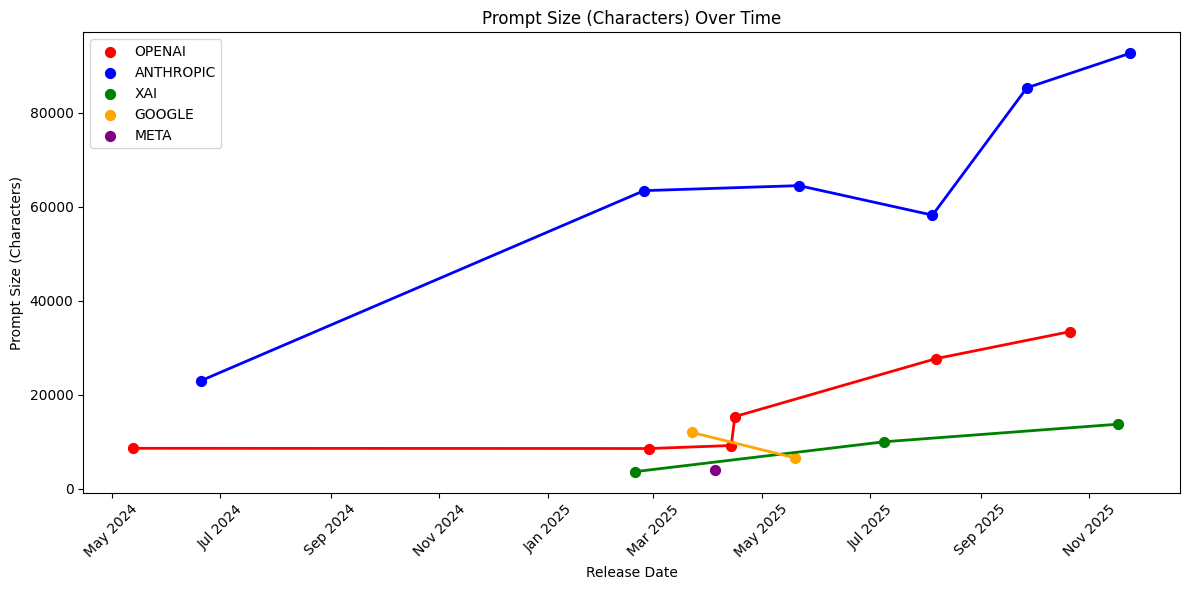

In [13]:
plot_prompt_evolution()

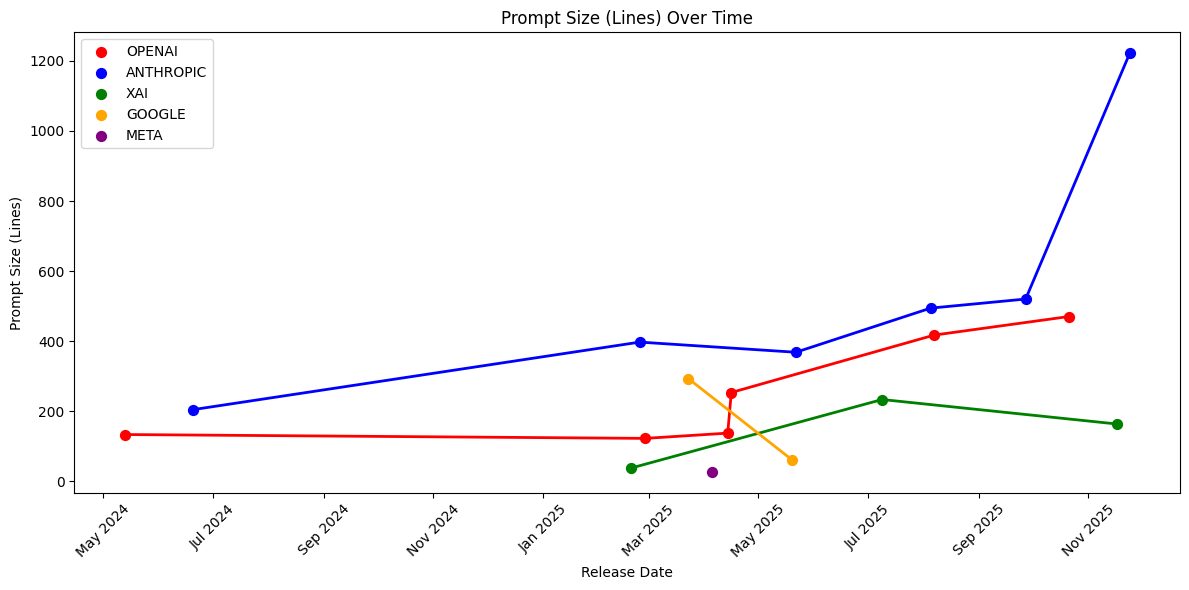

In [14]:
plot_prompt_evolution(metric='Size (Lines)')

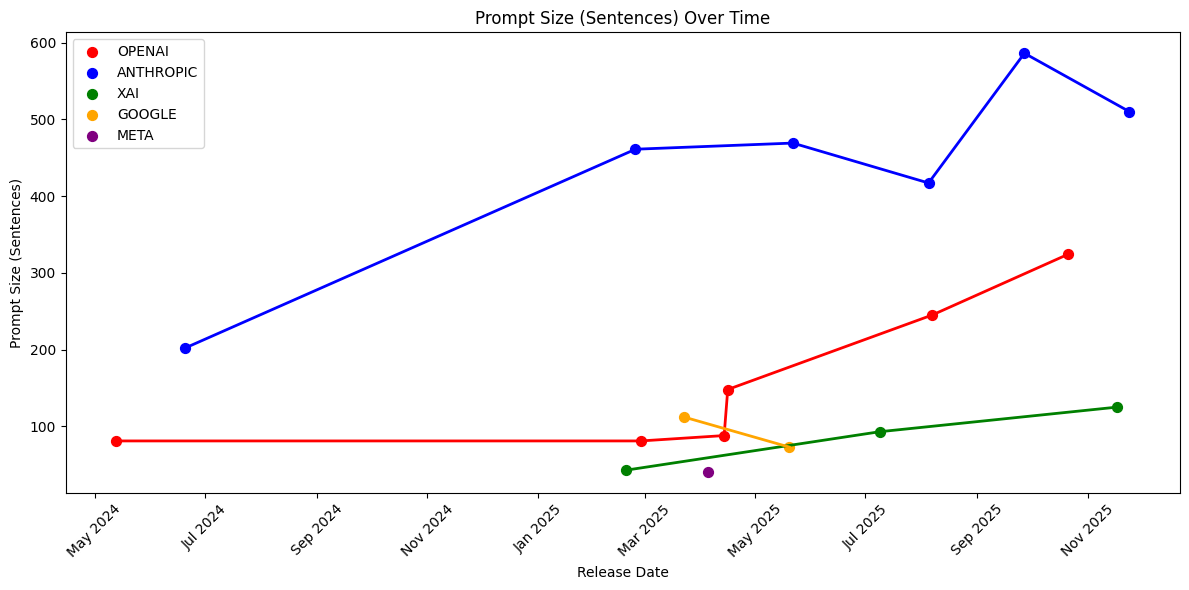

In [15]:
plot_prompt_evolution(metric='Size (Sentences)')

## NCtW Over Time

NCtW - the proportion of not-code related part of the prompt to the whole prompt

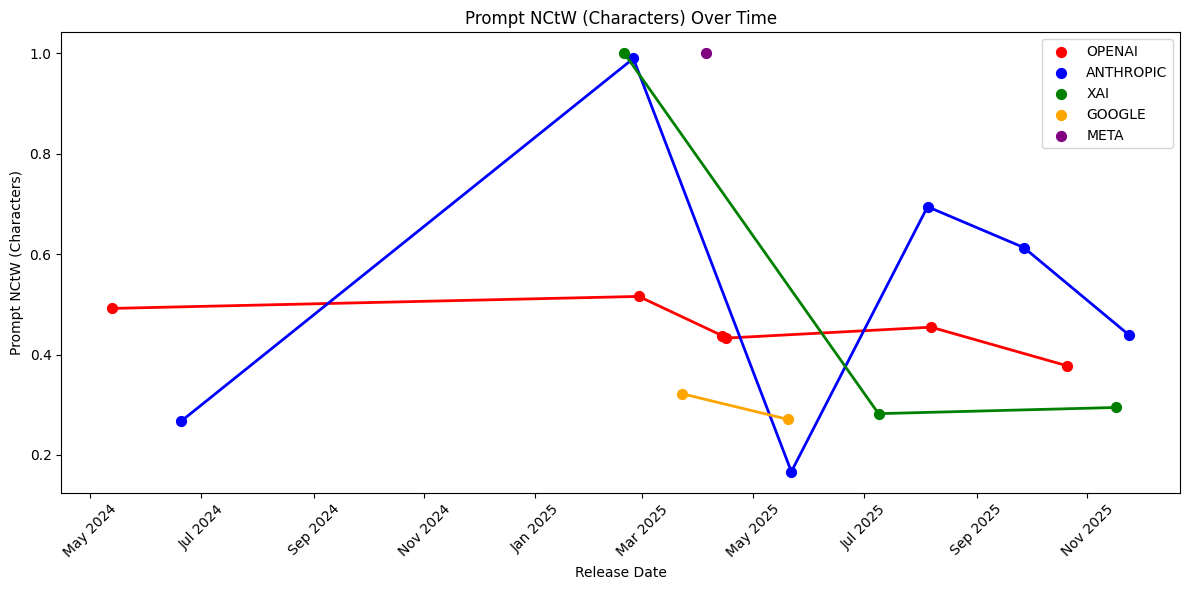

In [16]:
plot_prompt_evolution(metric='NCtW (Characters)')

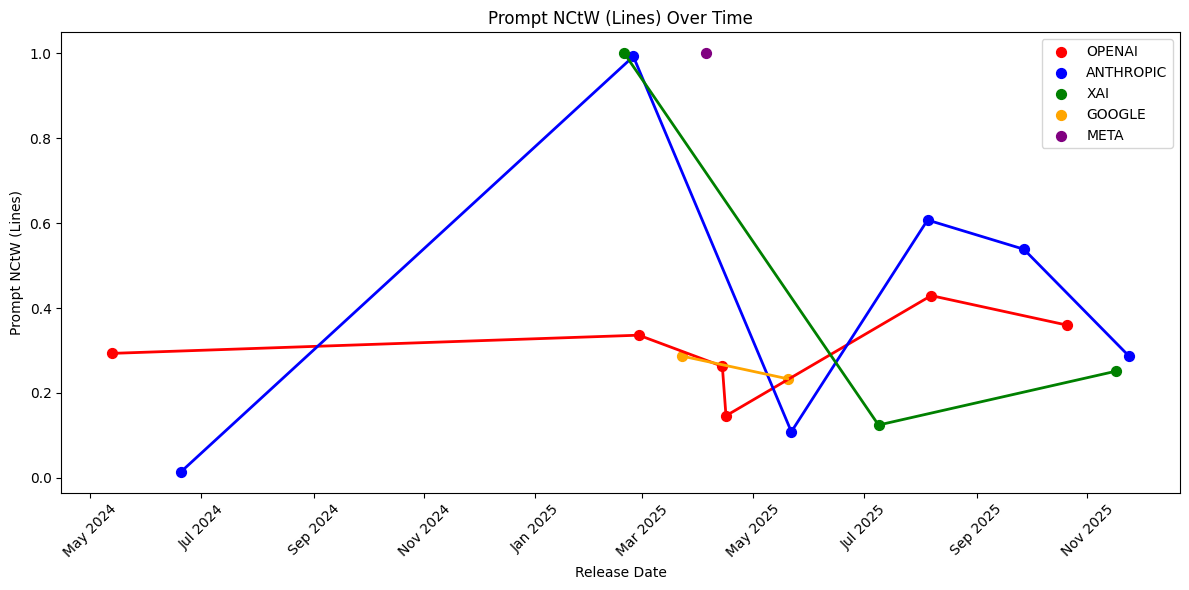

In [17]:
plot_prompt_evolution(metric='NCtW (Lines)')

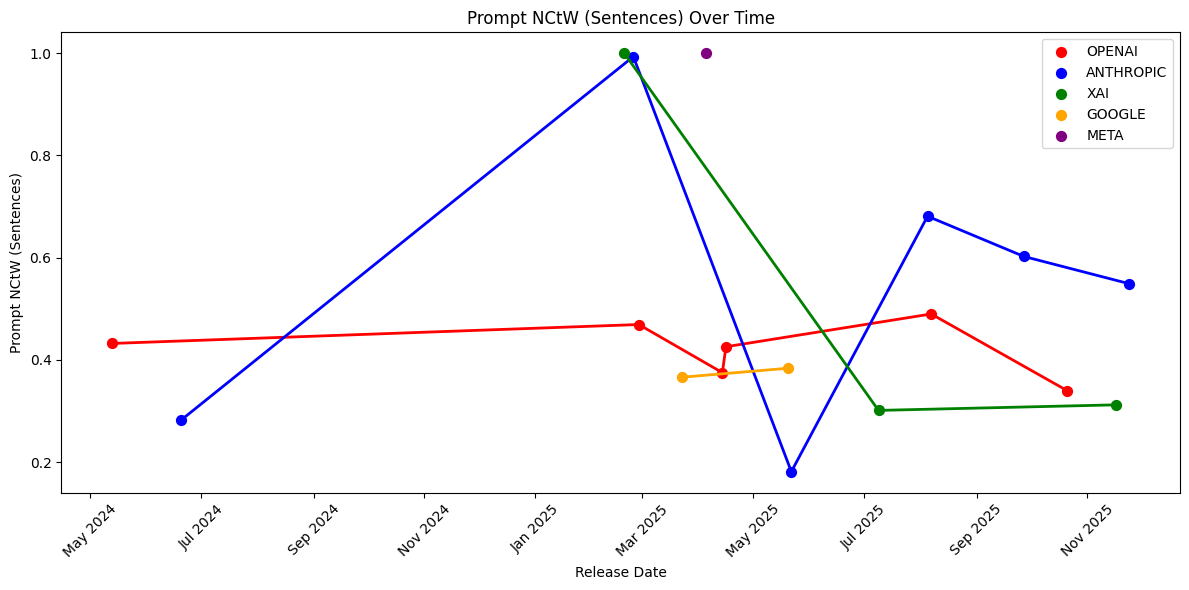

In [18]:
plot_prompt_evolution(metric='NCtW (Sentences)')